Na uvod import pouzitych knihoven, trochu lepsi zobrazeni pomoci Seaborn a rcParams

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

Nastaveni random seedu pro numpy a tensorflow, aby byl postup zrekonstruovatelny

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

nahrani dat a seznameni

In [3]:
raw = pd.read_csv('Banking Prediction Sample 1 - Dataset.csv')
raw.head()

,Customer_ID,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag
0,1,M,52,49,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0.0,20044.611429,0.000000,0,0,0,0,0,0
1,2,F,59,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0.0,0.000000,2430.224286,4,3,0,0,0,0
2,3,M,52,49,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0
3,4,M,54,49,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,7,0,0,12,0
4,5,F,61,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.720000,0,0,0,0,0,0


In [4]:
raw.isnull().sum()

Customer_ID              0
Gender                   0
Age                      0
Tenure                   0
Saving_Amount            0
Current_Amount           0
Time_Deposits_Amount     0
Funds_Amount             0
Stocks_Amount            0
Bank_Assurance_Amount    0
Life_Assurance_Amount    0
Business_Loan_Amount     0
Home_Loan_Amount         0
Consumer_Loan_Amount     0
Branch_Transactions      0
ATM_Transactions         0
Phone_Transactions       0
Internet_Transactions    0
Standing_Orders          0
New_Credit_Card_Flag     0
dtype: int64

Histogramy numerickych features

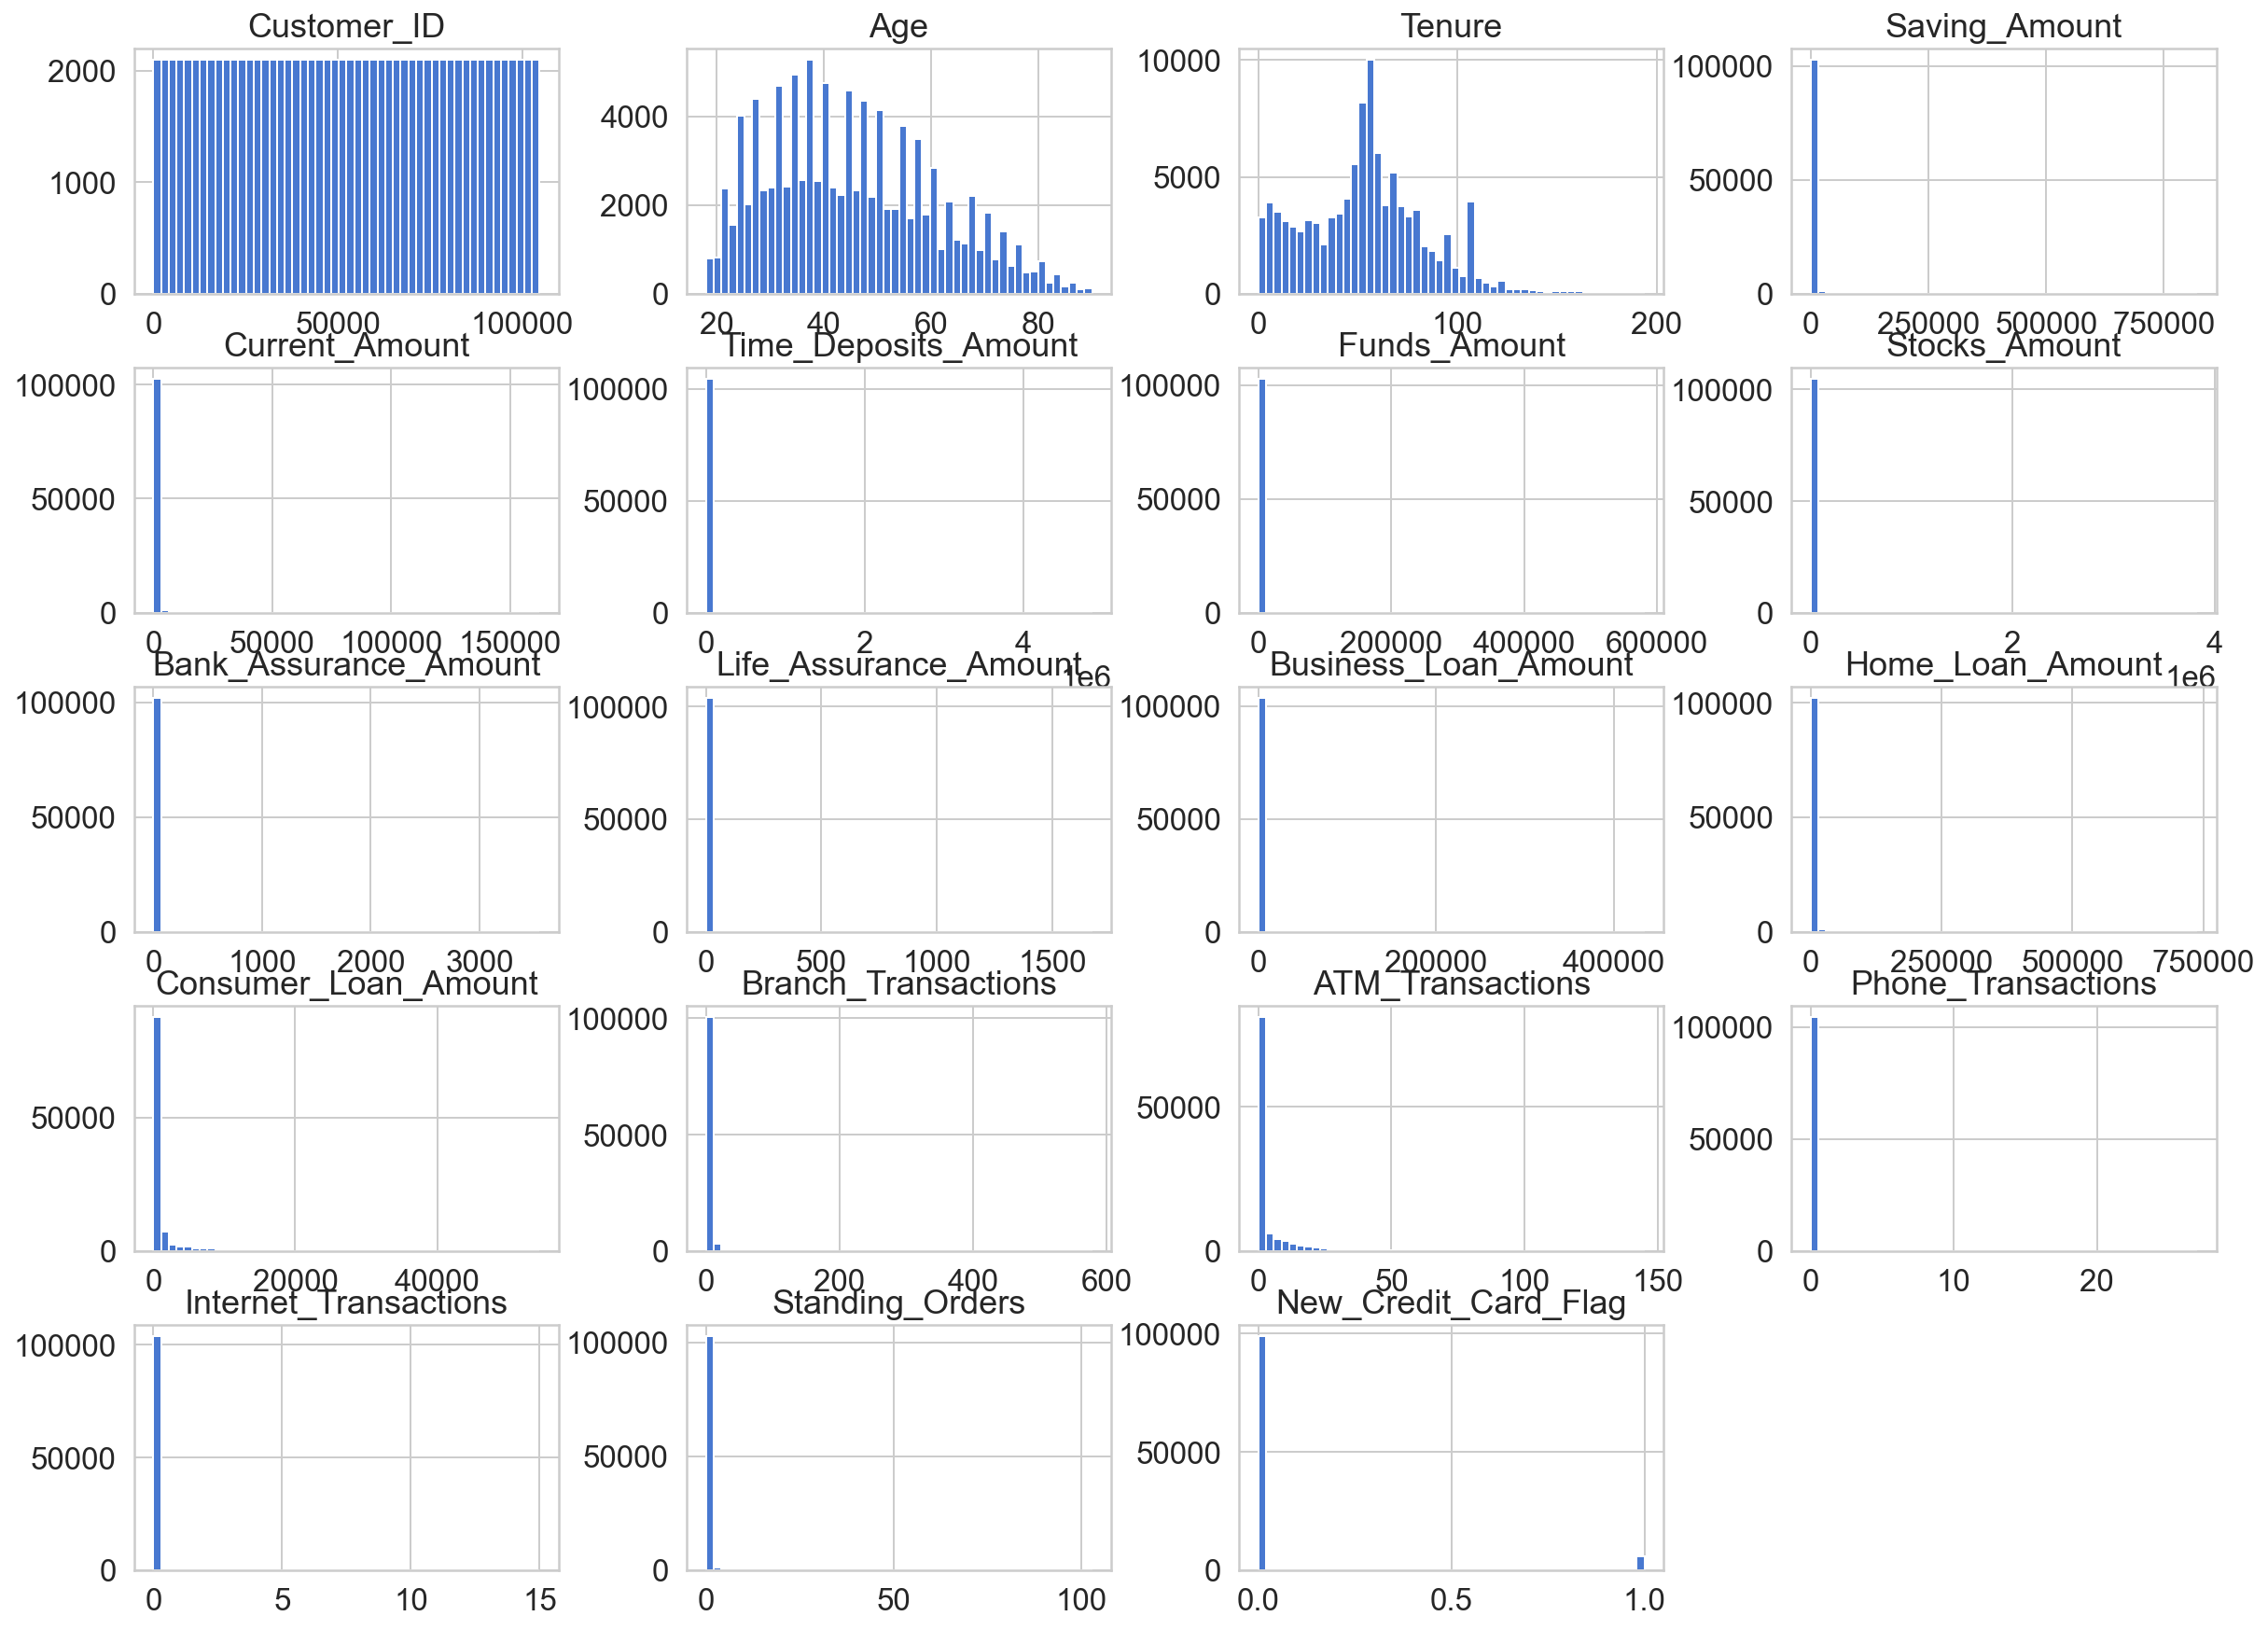

In [5]:
raw.hist(bins = 50, figsize = (20,15))
plt.show()

Cetnost pozitivnich targets

In [6]:
len(raw[raw['New_Credit_Card_Flag'] == 1])/len(raw)

0.05537891590998062

smazani sloupce ID

In [7]:
#alright, approx. 5.5%, this time I won't perform SMOTE
raw.drop('Customer_ID', axis = 1, inplace = True)

Detailnejsi pohled na nektere promenne

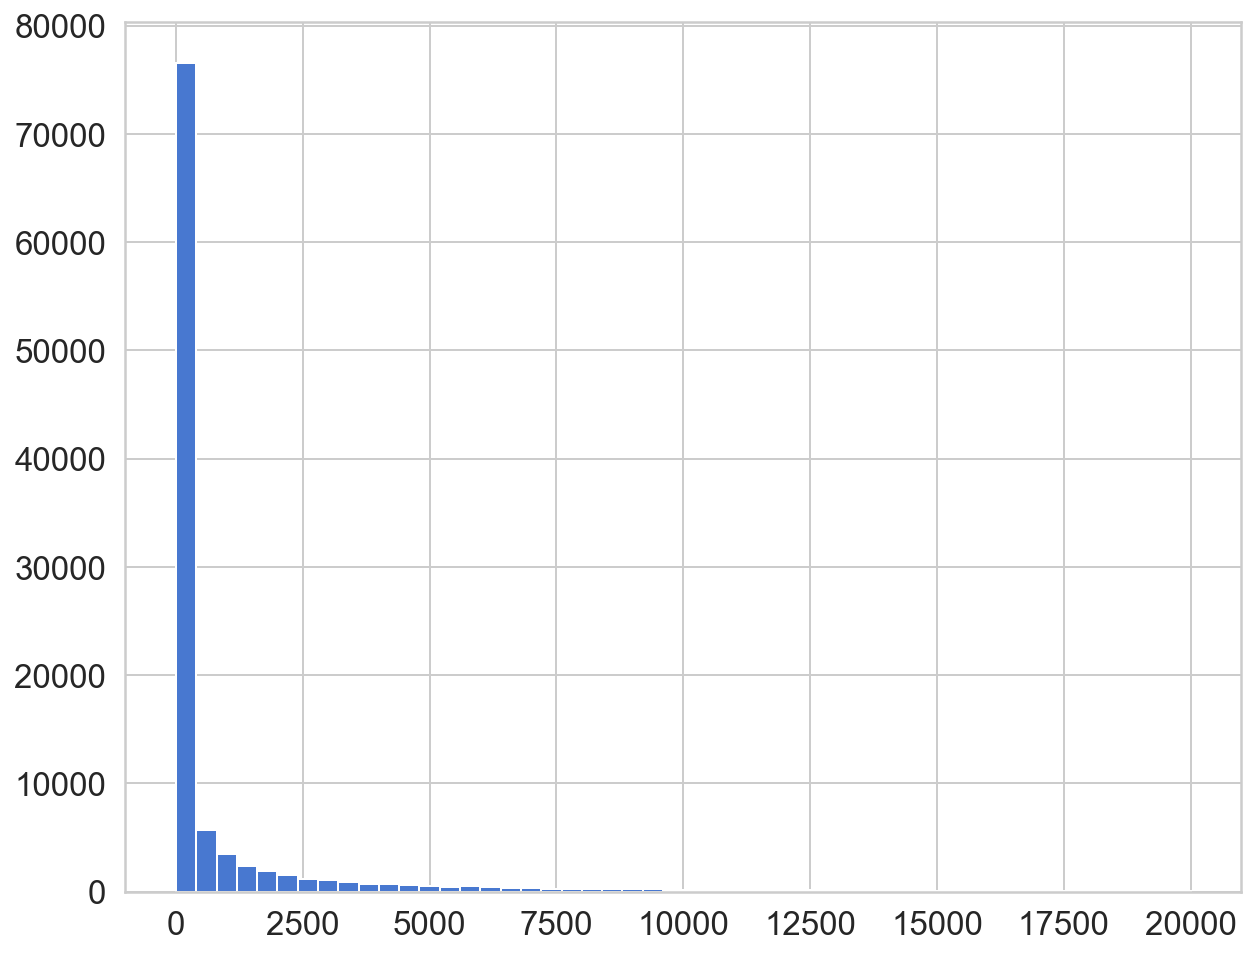

In [8]:
plt.figure(figsize = (10,8))
plt.hist(raw['Saving_Amount'], bins = 50, range=(0,20000))
plt.show()

In [9]:
#I can leave the age and tenure as they are, though the age histogram is a bit weird
raw['Saving_Amount'].groupby(raw['Saving_Amount'] > 10000).count()


Saving_Amount
False    100856
True       3877
Name: Saving_Amount, dtype: int64

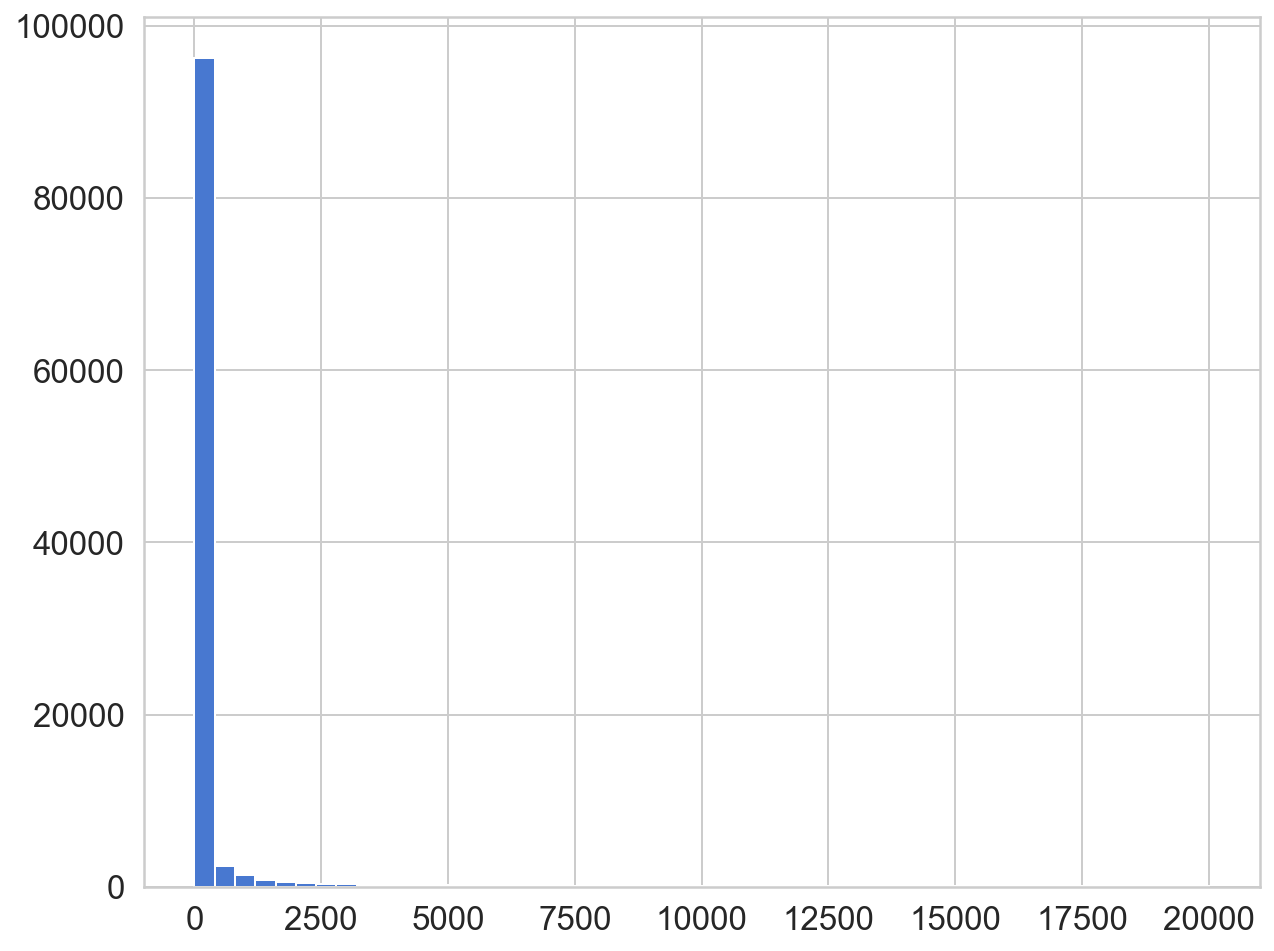

In [10]:
#well idk, maybe leave it as it is and scale it later with everything else
plt.figure(figsize = (10,8))
plt.hist(raw['Current_Amount'], bins = 50, range=(0,20000))
plt.show()

Tvorba sloupce Total Transactions a smazani puvodnich

In [11]:
raw['Total_transactions'] = raw.iloc[:, raw.columns.get_loc('Branch_Transactions'):raw.columns.get_loc('Internet_Transactions')].sum(axis=1)

In [12]:
raw.drop(['Branch_Transactions','ATM_Transactions','Phone_Transactions','Internet_Transactions'], axis = 1, inplace = True)

In [13]:
raw.columns

Index(['Gender', 'Age', 'Tenure', 'Saving_Amount', 'Current_Amount',
       'Time_Deposits_Amount', 'Funds_Amount', 'Stocks_Amount',
       'Bank_Assurance_Amount', 'Life_Assurance_Amount',
       'Business_Loan_Amount', 'Home_Loan_Amount', 'Consumer_Loan_Amount',
       'Standing_Orders', 'New_Credit_Card_Flag', 'Total_transactions'],
      dtype='object')

Prevedeni pohlavi na 0/1

In [14]:
raw['Gender'] =raw['Gender'].map({'M':0,'F':1})

In [15]:
raw['Gender'].value_counts()

0    61950
1    42783
Name: Gender, dtype: int64

In [16]:
raw['Consumer_Loan_Amount'].groupby(raw['Consumer_Loan_Amount'] > 10000).count()

Consumer_Loan_Amount
False    103797
True        936
Name: Consumer_Loan_Amount, dtype: int64

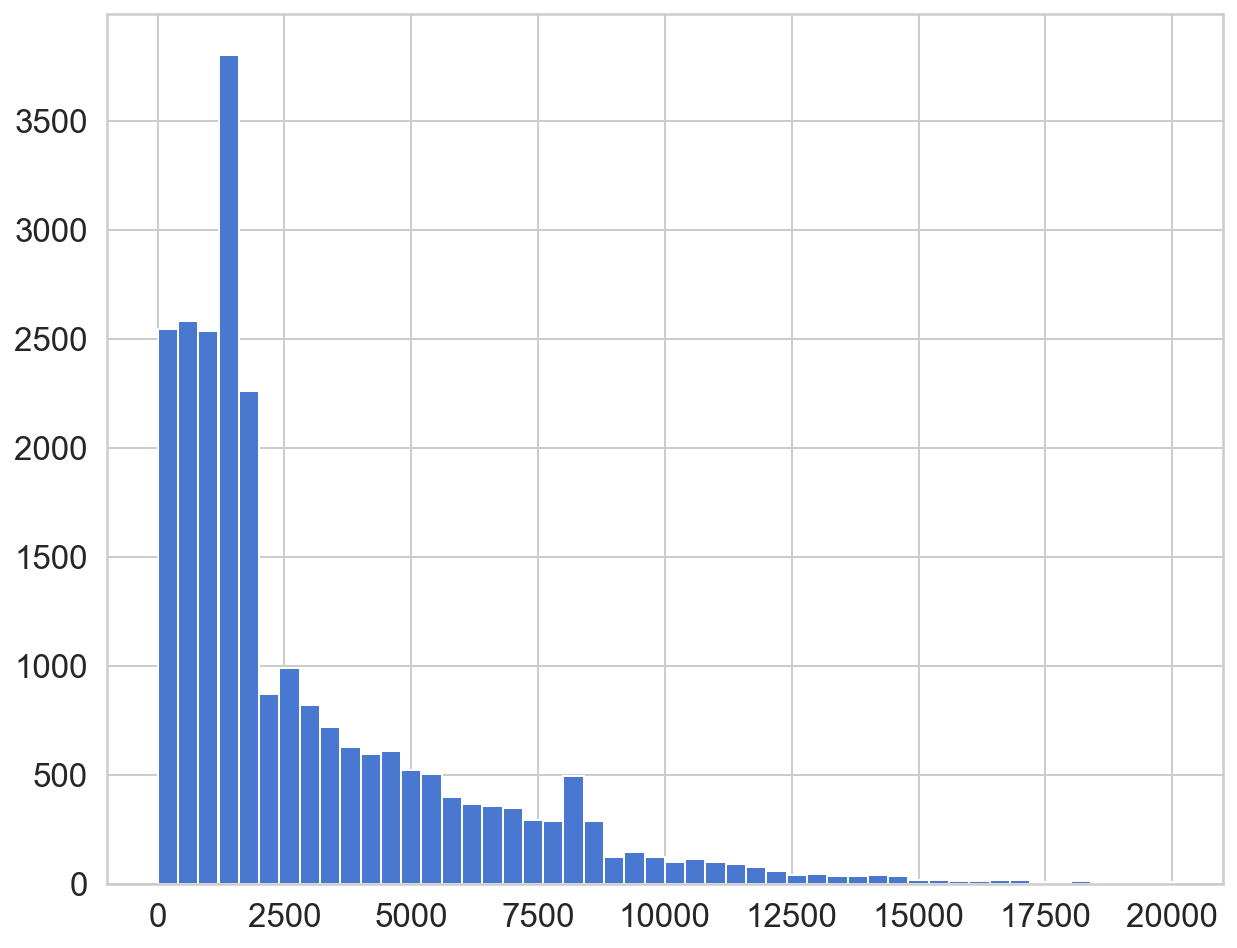

In [17]:
plt.figure(figsize = (10,8))
plt.hist(raw['Consumer_Loan_Amount'], bins = 50, range=(1,20000)) #nezobrazuji nuly
plt.show()

In [18]:
#let's just make  a total loans column

Tvorba promenne Total loans a smazani jejich dilcich casti

In [19]:
raw['Total_loans'] = raw.iloc[:, raw.columns.get_loc('Business_Loan_Amount'):raw.columns.get_loc('Consumer_Loan_Amount')].sum(axis=1)

In [20]:
raw.drop(['Business_Loan_Amount','Home_Loan_Amount','Consumer_Loan_Amount'], axis = 1, inplace = True)

In [21]:
raw['Total_loans'].mean()

1663.0864845539509

In [22]:
raw.head()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Standing_Orders,New_Credit_Card_Flag,Total_transactions,Total_loans
0,0,52,49,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0,0,0,20044.611429
1,1,59,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0,0,7,0.000000
2,0,52,49,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0.000000
3,0,54,49,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,12,0,14,0.000000
4,1,61,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0.000000


In [23]:
raw.columns

Index(['Gender', 'Age', 'Tenure', 'Saving_Amount', 'Current_Amount',
       'Time_Deposits_Amount', 'Funds_Amount', 'Stocks_Amount',
       'Bank_Assurance_Amount', 'Life_Assurance_Amount', 'Standing_Orders',
       'New_Credit_Card_Flag', 'Total_transactions', 'Total_loans'],
      dtype='object')

Preorganizovani dat a tvorba targets

In [24]:
df = raw[['Gender', 'Age', 'Tenure', 'Saving_Amount', 'Current_Amount',
       'Time_Deposits_Amount', 'Funds_Amount', 'Stocks_Amount',
       'Bank_Assurance_Amount', 'Life_Assurance_Amount', 'Standing_Orders',
       'Total_transactions', 'Total_loans', 'New_Credit_Card_Flag']]

In [25]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X.head()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Standing_Orders,Total_transactions,Total_loans
0,0,52,49,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0,0,20044.611429
1,1,59,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0,7,0.000000
2,0,52,49,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0.000000
3,0,54,49,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,12,14,0.000000
4,1,61,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0.000000


Skalovani dat, tentokrate pomoci Robust Scaleru, ktery penalizuje outliers 

In [26]:
from sklearn.preprocessing import RobustScaler #robust to outliers

scaler = RobustScaler()

scaler.fit_transform(X)

array([[ 0.00000000e+00,  3.91304348e-01, -1.57894737e-01, ...,
         0.00000000e+00, -2.85714286e-01,  2.00446114e+04],
       [ 1.00000000e+00,  6.95652174e-01, -1.57894737e-01, ...,
         0.00000000e+00,  7.14285714e-01,  0.00000000e+00],
       [ 0.00000000e+00,  3.91304348e-01, -1.57894737e-01, ...,
         0.00000000e+00, -2.85714286e-01,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -8.26086957e-01, -1.44736842e+00, ...,
         0.00000000e+00, -2.85714286e-01,  0.00000000e+00],
       [ 0.00000000e+00, -3.47826087e-01, -1.44736842e+00, ...,
         0.00000000e+00, -2.85714286e-01,  0.00000000e+00],
       [ 0.00000000e+00,  8.69565217e-01, -1.44736842e+00, ...,
         0.00000000e+00, -2.85714286e-01,  0.00000000e+00]])

Rozdeleni na train, valid a test set pro ucely uceni

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 10000, random_state = 42)

In [28]:
print(len(X_train), len(X_valid), len(X_test))

84733 10000 10000


In [29]:
print(len(y_train), len(y_valid), len(y_test))

84733 10000 10000


Opet pouzit voting classifier, nejprve samostatne estimatory a nakonec hard voting classifier

In [30]:
#basic voting classifier 

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [31]:
#estimators = [random_forest_clf, extra_trees_clf, mlp_clf]
#for estimator in estimators:
#    print("Training the", estimator)
#    estimator.fit(X_train, y_train)

In [32]:
#[estimator.score(X_valid, y_valid) for estimator in estimators]

Naskladani jednotlivych algoritmu na sebe a trenink na datech

In [33]:
from sklearn.ensemble import VotingClassifier


named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("mlp_clf", mlp_clf),
]

voting_clf = VotingClassifier(named_estimators)

#voting_clf.fit(X_train, y_train)

Skore voting classifieru na validacnich datech, nic moc vzhledem k datum

In [34]:
#voting_clf.score(X_valid, y_valid)

Presnost voting classifieru na test datasetu (dobrych by bylo 0.98)

In [35]:
#sucks as expected haha
from sklearn.metrics import accuracy_score

#y_pred = voting_clf.predict(X_test)
#accuracy_score(y_test, y_pred)

Presvedcime se, ze nepredvida pouze 0

In [36]:
#(y_pred == 1).sum() #but it does predict something 

In [37]:
#X_train.shape

## NN v TensorFlow

Opet pouzivame architekturu pro binarni klasifikaci, pomoci ctyr vrstev (input, 2x hidden layer s ReLU aktivacni funkci a output s akt. f. Sigmoid pro 0/1 vystup)

Adam lze opet upravit pomoci hyperparametru Learning Rate

Metrika pro ztratu je Binarni krizova entropie a vykon zmeri AUC

konstrukce modelu:

In [38]:
#let's get things done properly
import tensorflow as tf
import tensorflow.keras as keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_size = len(X_train.columns)
output_size = 1 #with sigmoid, with softmax probabilities it's 2
lr = 0.003
adam = tf.keras.optimizers.Adam(lr)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size, input_shape = (X_train.shape[-1],), activation = 'relu'),
    tf.keras.layers.Dense(27, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'sigmoid') #binary outputs
])

model.compile(optimizer = adam, loss = 'BinaryCrossentropy', metrics = METRICS)

Uceni modelu

In [40]:
batch_size = 5000 #pay attention to the frequency of positive cases, the model has to have positive cases to learn from
epochs = 150
patience = 20
early = tf.keras.callbacks.EarlyStopping (patience = patience)

#history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_valid, y_valid),
#                   verbose = 0) #callbacks = [early]

A opet nakonec plot ztraty na train a valid datech a celkoveho AUC skore.

In [41]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['loss', 'val_loss'], loc='upper left')

In [42]:
#plt.plot(history.history['auc'])
#plt.plot(history.history['val_auc'])
#plt.title('model auc')
#plt.ylabel('auc')
#plt.xlabel('epoch')
#plt.legend(['auc', 'test_auc'], loc='upper left')

Po testovani hyperparametru epochs se ukazalo, ze vhodna hodnota je pro tento model mezi 100-150, ale je mozne si hrat s ostatnimi parametry. Je dobre nastavit treba LR na 0.5 a sledovat na tech grafech, jak adam osciluje a nemuze zkonvergovat k minimu.

In [43]:
from sklearn import metrics

#ypred5 = model.predict(X_test)

In [44]:
#fpr, tpr, thresholds = metrics.roc_curve(y_test, ypred5)
#metrics.auc(fpr, tpr) 

In [45]:
#(ypred5 == 1).sum() 

In [46]:
#(y_test == 1).sum() 

## Random Forest once again

In [47]:
les = RandomForestClassifier(n_estimators = 100, random_state = 42)

les.fit(X_train, y_train)
ypred1 = les.predict(X_valid)
accuracy_score(y_valid, ypred1)

0.943

In [48]:
(ypred1==1).sum()

187

In [49]:
(y_valid==1).sum()

575

random stuff


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: New_Credit_Card_Flag, dtype: int64

In [54]:
neg, pos = np.bincount(df['New_Credit_Card_Flag'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104733
    Positive: 5800 (5.54% of total)



In [56]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 9.03


In [80]:
batch_size = 500
epochs = 150
lr = 0.005

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_valid, y_valid),
                    class_weight = class_weight, verbose = 0)


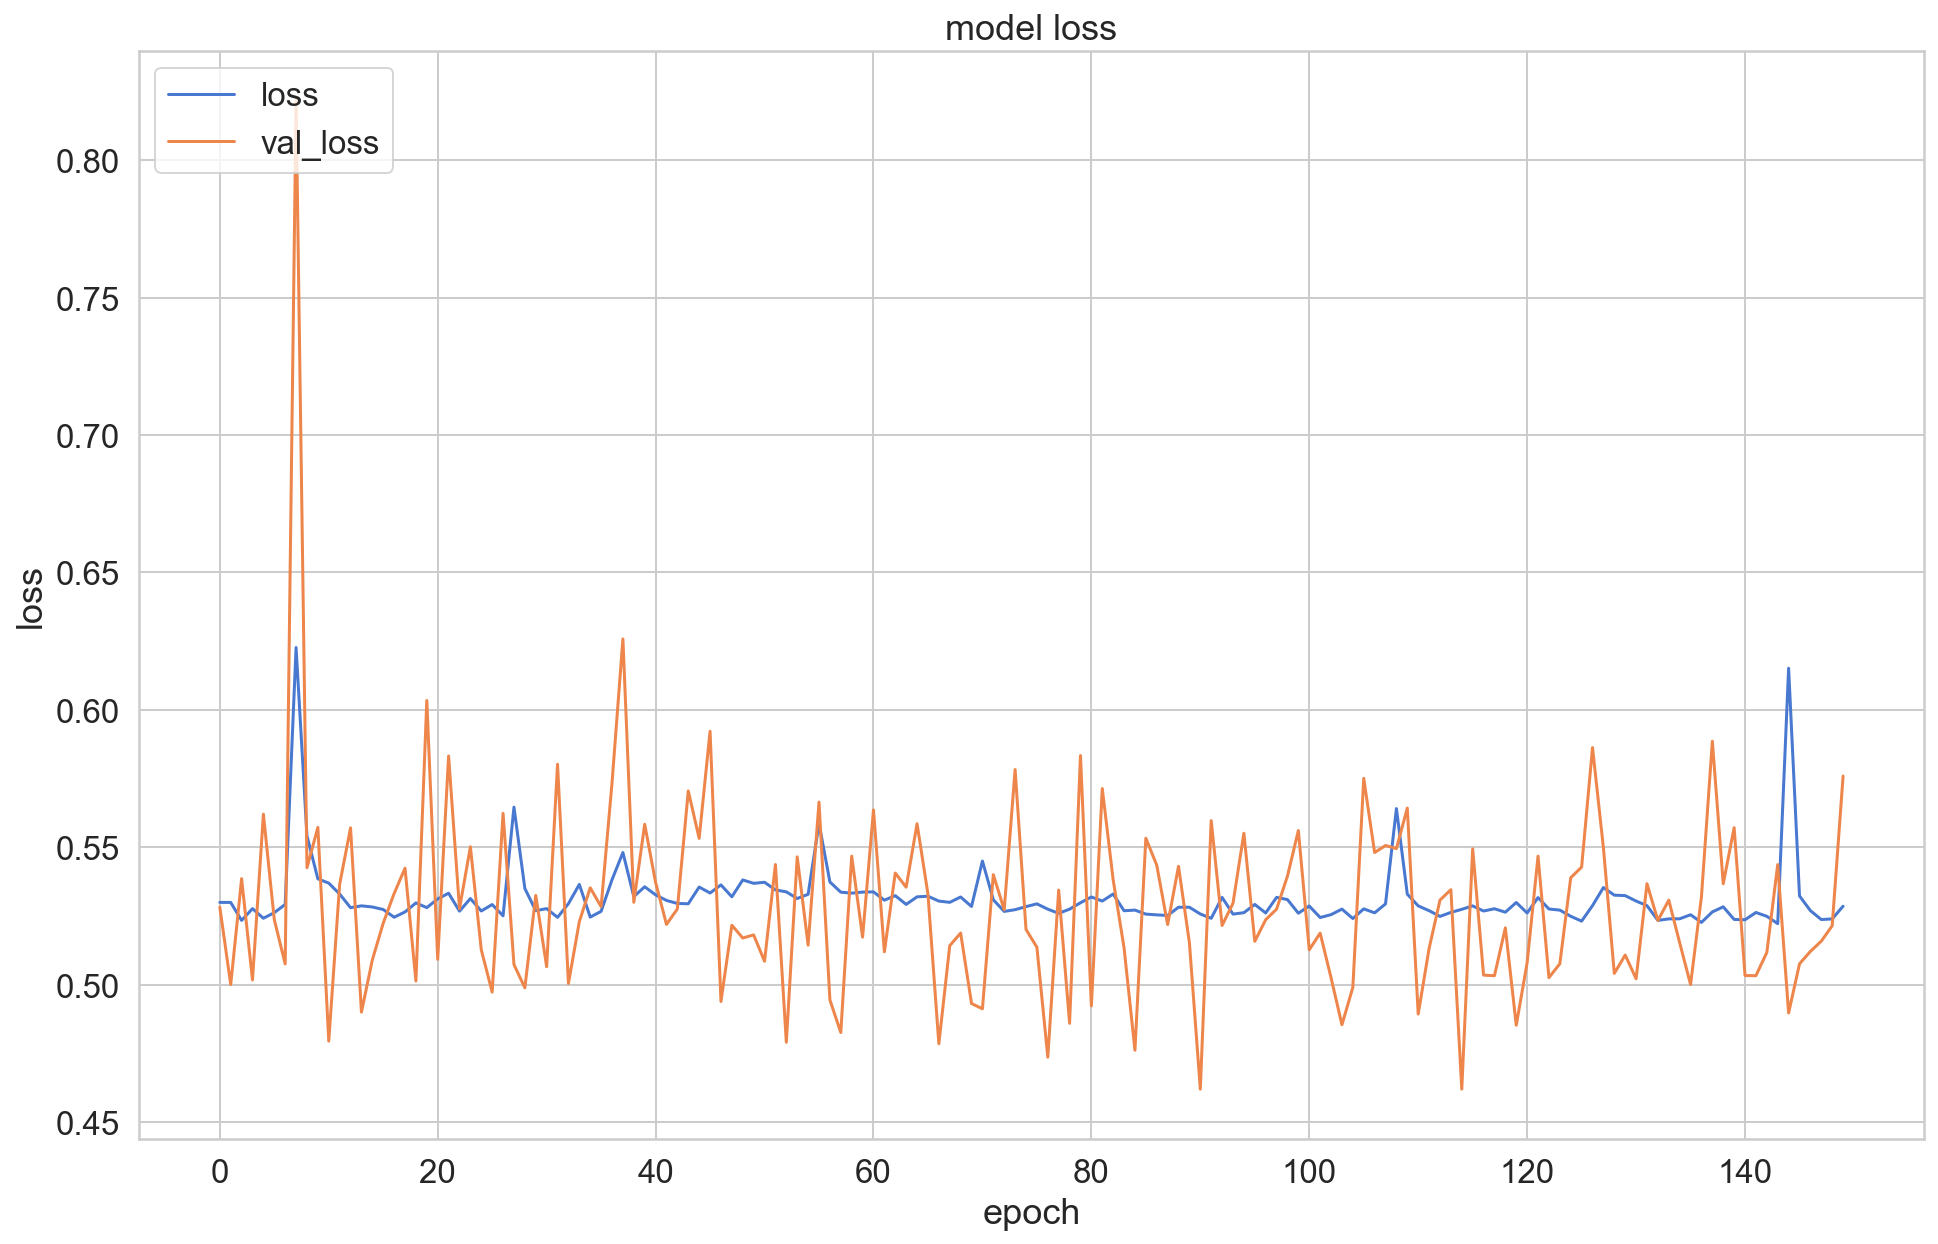

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')

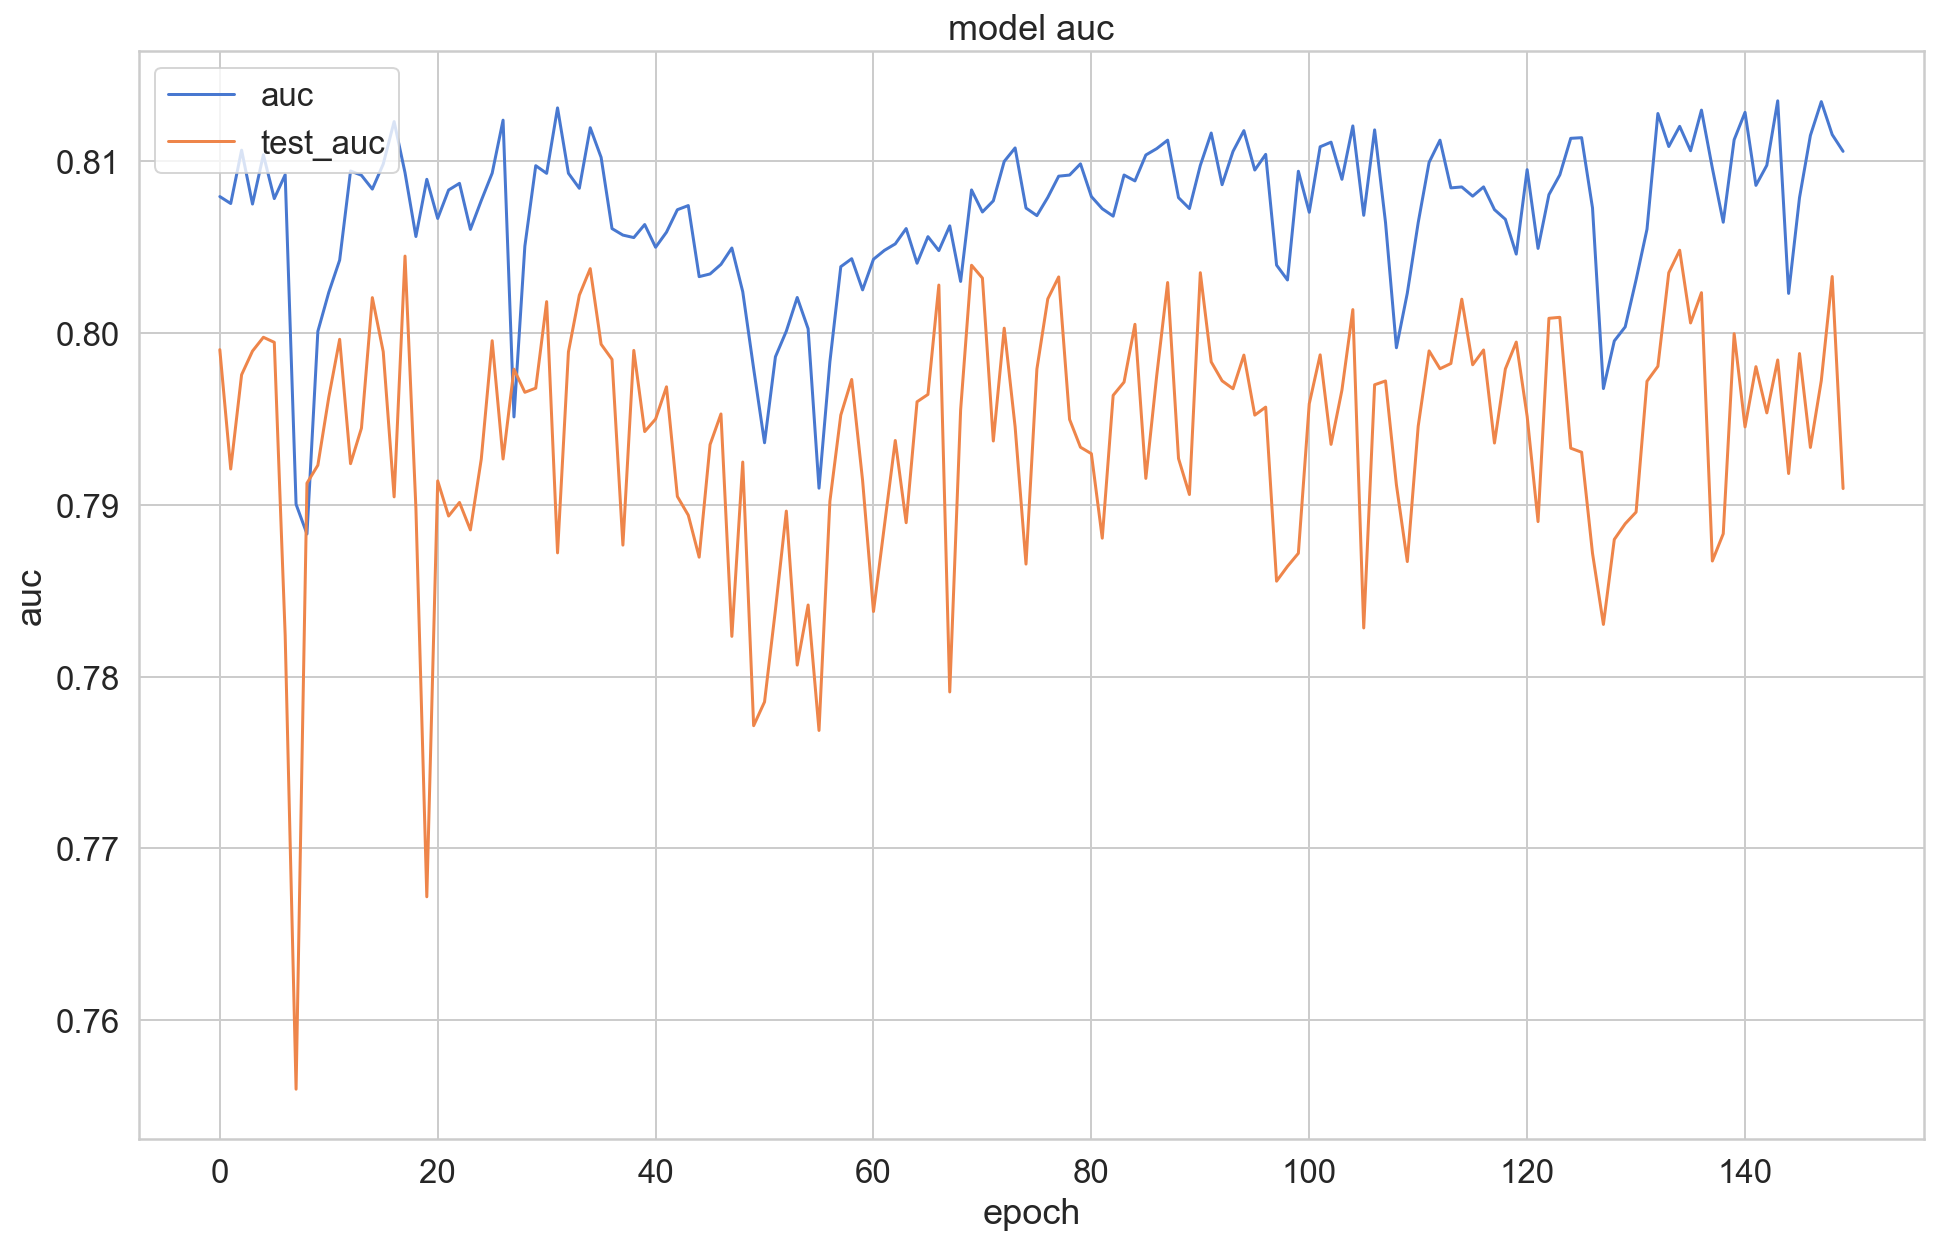

In [82]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['auc', 'test_auc'], loc='upper left')

In [83]:
from sklearn import metrics

ypred5 = model.predict(X_test)

In [84]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, ypred5)
metrics.auc(fpr, tpr) 

0.7852806620686211

In [85]:
(ypred5 == 1).sum() 

0

In [86]:
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('No New Card Detected (True Negatives): ', cm[0][0])
  print('New Card Incorrectly Detected (False Positives): ', cm[0][1])
  print('New Cards Missed (False Negatives): ', cm[1][0])
  print('New Cards Detected (True Positives): ', cm[1][1])
  print('Total New Cards: ', np.sum(cm[1]))

No New Card Detected (True Negatives):  7142
New Card Incorrectly Detected (False Positives):  2316
New Cards Missed (False Negatives):  188
New Cards Detected (True Positives):  354
Total New Cards:  542


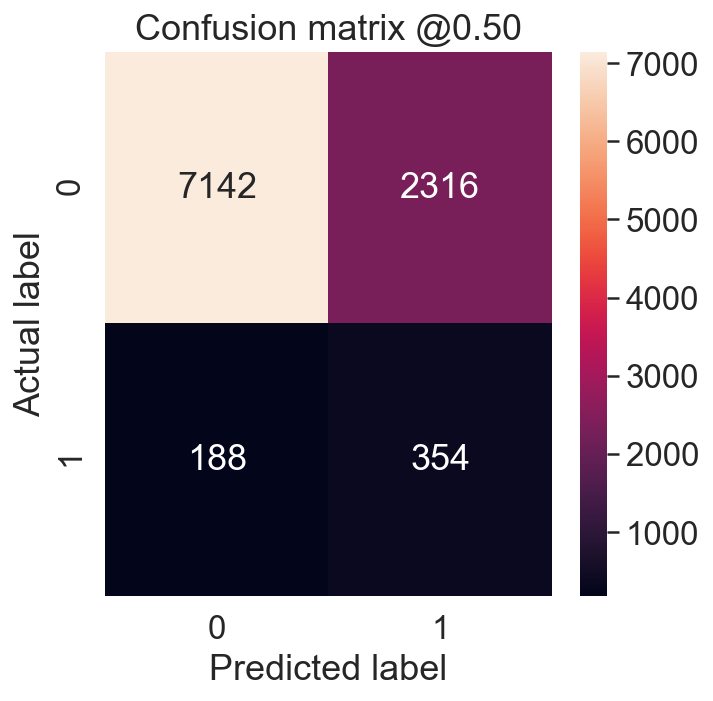

In [87]:
plot_cm(y_test, ypred5)